Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 26, 26, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 384)       885120

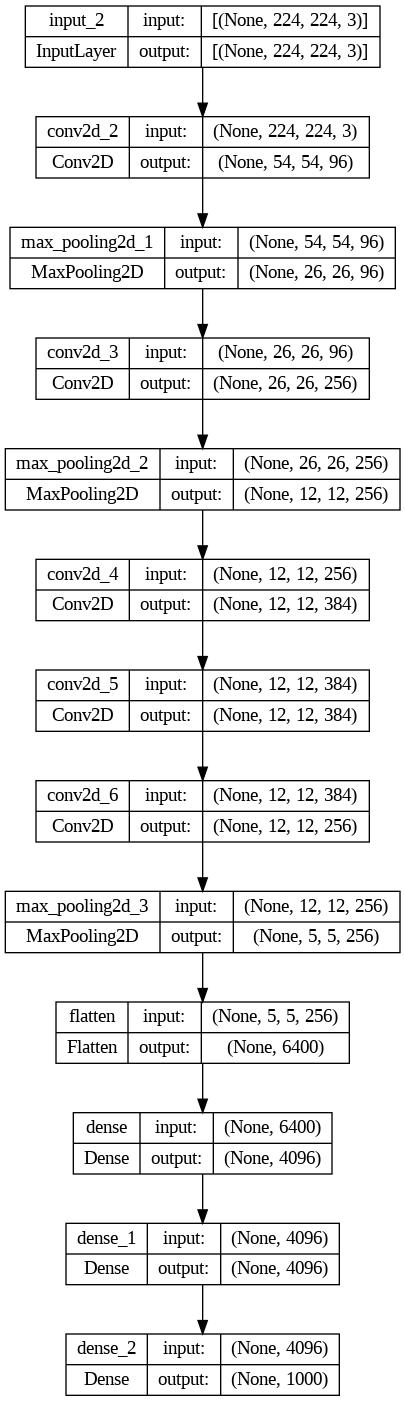

In [3]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Input, Concatenate, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Model

main_input = Input(shape=(224, 224, 3))
conv1 = Conv2D(96, (11,11), strides=4, padding='valid') (main_input)
conv2 = MaxPooling2D((3,3), strides=2) (conv1)
conv3 = Conv2D(256, (5,5), padding='same') (conv2)
conv4 = MaxPooling2D((3,3), strides=2) (conv3)
conv5 = Conv2D(384, (3,3), padding='same') (conv4)
conv6 = Conv2D(384, (3,3), padding='same') (conv5)
conv7 = Conv2D(256, (3,3), padding='same') (conv6)
conv8 = MaxPooling2D((3,3), strides=2) (conv7)

# strides : 필터가 건너뛰는 크기
# padding 설정 없을 경우 --> padding = 'valid'

conv_flat = Flatten() (conv8)
dense1 = Dense(4096, activation='relu') (conv_flat)
dense2 = Dense(4096, activation='relu') (dense1)
output = Dense(1000, activation='softmax') (dense2)

# 모델 구성 (입력값들과 출력값들)
model = Model(inputs=[main_input], outputs=[output])
model.summary()

# 출력
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.jpg', show_shapes=True)